In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
data=pd.read_csv(r"C:\Users\Admin\Downloads\loan_dataset.csv")

In [3]:
#Viewing data
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
#Checking columns
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [5]:
# Checking null values
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [6]:
# Checking datatypes
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [7]:
data.shape

(116058, 29)

In [8]:
data['loan_id'].nunique()

116058

In [9]:
# Dropping irrelevant columns
data.drop(['loan_id', 'source', 'financial_institution','origination_date',
       'first_payment_date','loan_purpose'],axis=1,inplace=True)

In [10]:
data.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,0,0,1,1,1,1,1
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,3,4,5,6,7,8,9,10,11,1


In [11]:
data.dtypes

interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                           int64
dtype: object

In [12]:
data['insurance_type'].nunique()

2

In [13]:
# Separating feature and target
X=data.drop('m13',axis=1)
y=data['m13']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Splitting training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

## LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Logistic Regression model
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(X_train,y_train)
log_pred=log_reg_model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
print('Confusion Matrix is : \n',confusion_matrix(y_test,log_pred))

Confusion Matrix is : 
 [[23072    12]
 [  128     0]]


In [20]:
print('Accuracy Score is : ',accuracy_score(y_test,log_pred))

Accuracy Score is :  0.9939686369119421


In [21]:
from sklearn.metrics import precision_score,recall_score

In [22]:
precision_score(y_test,log_pred)

0.0

In [23]:
recall_score(y_test,log_pred)

0.0

## SVM

In [24]:
from sklearn.svm import SVC

In [25]:
# SVM model
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)

In [26]:
#Confusion matrix
print('Confusion Matrix is : \n',confusion_matrix(y_test,svm_pred))

Confusion Matrix is : 
 [[23084     0]
 [  128     0]]


In [27]:
print('Accuracy Score is : ',accuracy_score(y_test,svm_pred))

Accuracy Score is :  0.9944856108909185


In [28]:
print('Recall Score is : ',recall_score(y_test,svm_pred))

Recall Score is :  0.0


## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# find the optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

In [31]:
metric_k

[0.993839393417198,
 0.9943563673961744,
 0.9942271239014303,
 0.9944856108909185,
 0.9944425297260038,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185,
 0.9944856108909185]

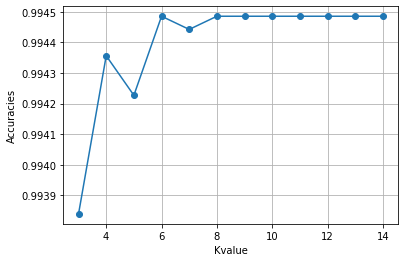

In [32]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [33]:
classifier=KNeighborsClassifier(n_neighbors=6)
classifier=classifier.fit(X_train,y_train)
y_pred_KNN=classifier.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_KNN)

0.9944856108909185

In [35]:
confusion_matrix(y_test,y_pred_KNN)

array([[23084,     0],
       [  128,     0]], dtype=int64)

## DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
#Decision tree model
dct_clf=DecisionTreeClassifier()
dct_clf=dct_clf.fit(X_train,y_train)
y_pred_dct=dct_clf.predict(X_test)


In [38]:
confusion_matrix(y_test,y_pred_dct)

array([[22990,    94],
       [   83,    45]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_dct)

0.9923746338100983

## RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [42]:
confusion_matrix(y_test,y_pred_rf)

array([[23076,     8],
       [   83,    45]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred_rf)

0.9960796139927623

## Random Forest have best accuracy 99.6%